## Importing necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Global Initialization Of some important variables

In [2]:
Image_Size = 256
Batch_Size = 32
Channels = 3
Epochs = 50

## Spliting the dataset
#### The dataset is divided into three sets
1. Training dataset: For training the model
2. Validation dataset : For validating the model
3. Test Dataset: For testing the model

We have used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/Tomato_disease_catagories

## Data augmentation on the fly using Keras ImageDataGenerator
Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc. Here we have train generators for all the three sets of data that is train, test and validation

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip = True
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = (Image_Size, Image_Size),
    batch_size = Batch_Size,
    class_mode = 'sparse'
)

Found 12804 images belonging to 10 classes.


The  10 classes that the tomato plant may belong are as follows:

In [4]:
classes = list(train_generator.class_indices.keys())
classes

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

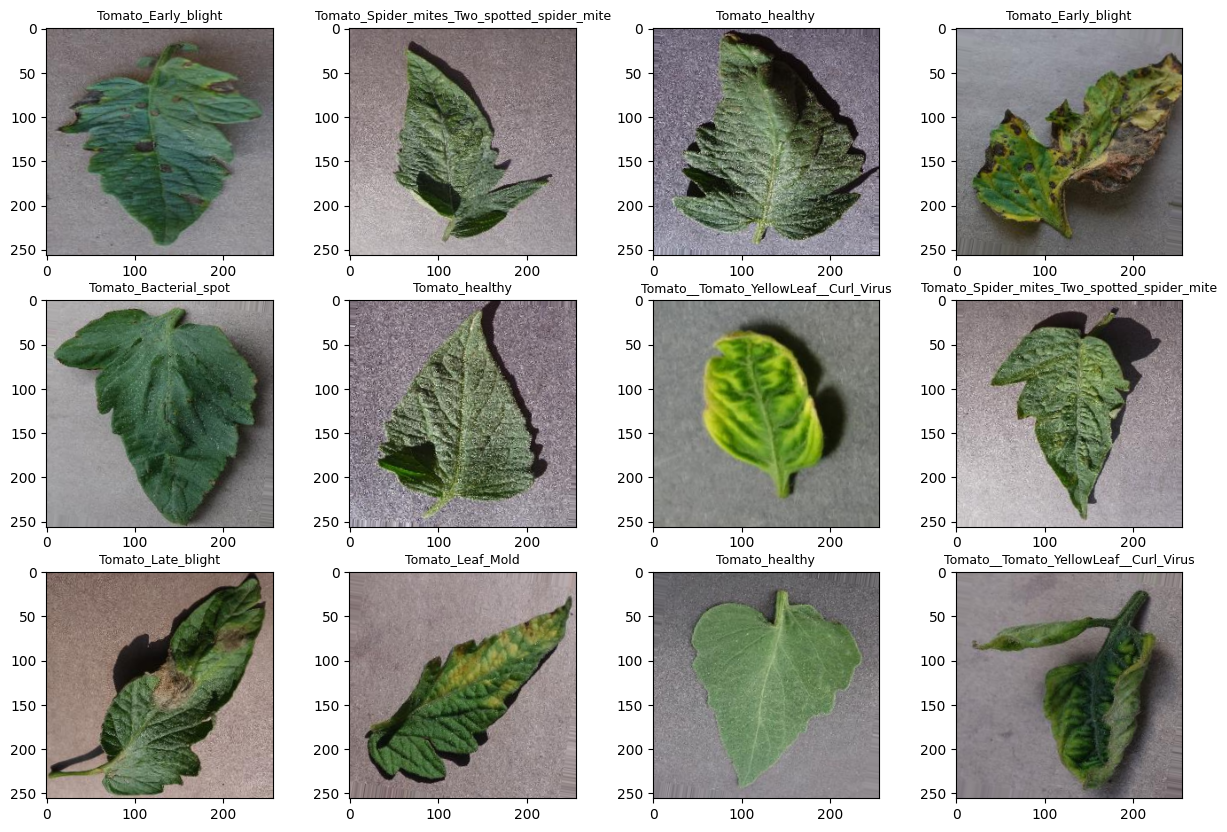

In [5]:
plt.figure(figsize=(15, 10))
for image_batch, label_batch in train_generator:
    for i in range (12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i])
        plt.title(classes[int(label_batch[i])], fontdict={'fontsize': 9})
    break

In [6]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip = True
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = (Image_Size, Image_Size),
    batch_size = Batch_Size,
    class_mode = 'sparse'
)

Found 1597 images belonging to 10 classes.


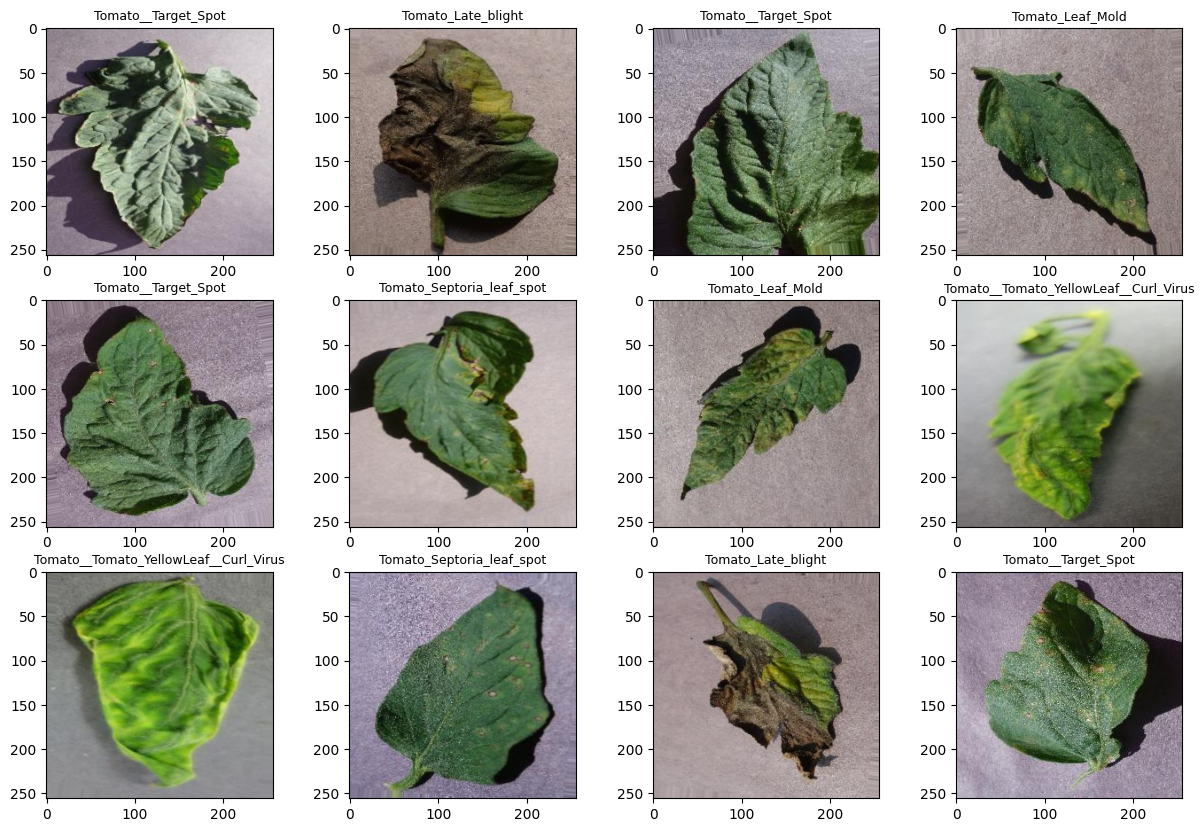

In [7]:
plt.figure(figsize=(15, 10))
for image_batch, label_batch in validation_generator:
    for i in range (12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i])
        plt.title(classes[int(label_batch[i])], fontdict={'fontsize': 9})
    break

In [8]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip = True
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (Image_Size,Image_Size),
    batch_size = Batch_Size,
    class_mode = 'sparse'
)

Found 1610 images belonging to 10 classes.


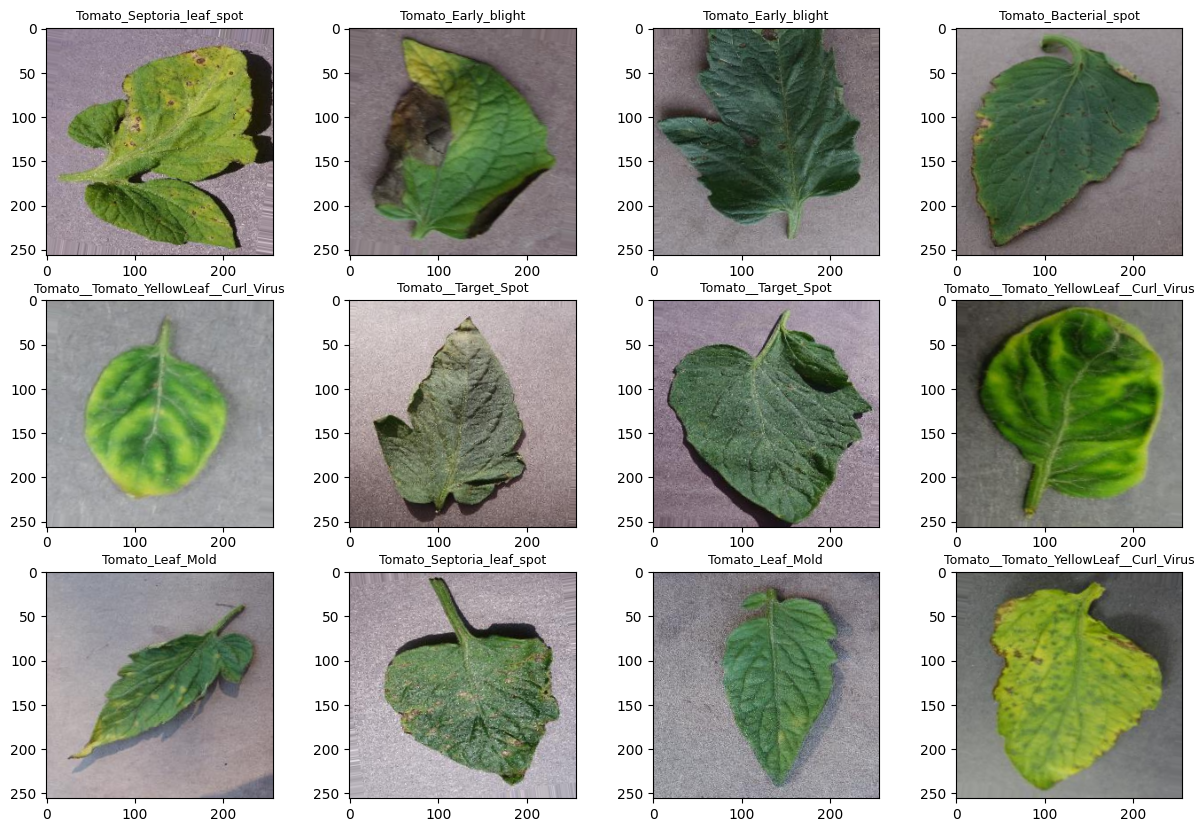

In [9]:
plt.figure(figsize=(15, 10))
for image_batch, label_batch in test_generator:
    for i in range (12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i])
        plt.title(classes[int(label_batch[i])], fontdict={'fontsize': 9})
    break

## Model Building

In [10]:
input_shape = (Image_Size, Image_Size, Channels)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric.

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## Training the network

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=400,
    batch_size=Batch_Size,
    validation_data=validation_generator,
    validation_steps=49,
    verbose=1,
    epochs=Epochs,
)

Epoch 1/50
400/400 [==============================] - 1413s 4s/step - loss: 1.7278 - accuracy: 0.3720 - val_loss: 1.2589 - val_accuracy: 0.5293
Epoch 2/50
400/400 [==============================] - 1319s 3s/step - loss: 1.0851 - accuracy: 0.6105 - val_loss: 0.7843 - val_accuracy: 0.7232
Epoch 3/50
400/400 [==============================] - 1380s 3s/step - loss: 0.7625 - accuracy: 0.7250 - val_loss: 0.6440 - val_accuracy: 0.7647
Epoch 4/50
400/400 [==============================] - 1463s 4s/step - loss: 0.6044 - accuracy: 0.7794 - val_loss: 0.5045 - val_accuracy: 0.8259
Epoch 5/50
400/400 [==============================] - 1485s 4s/step - loss: 0.5357 - accuracy: 0.8063 - val_loss: 0.5442 - val_accuracy: 0.8138
Epoch 6/50
400/400 [==============================] - 1508s 4s/step - loss: 0.4496 - accuracy: 0.8407 - val_loss: 0.3610 - val_accuracy: 0.8680
Epoch 7/50
400/400 [==============================] - 1639s 4s/step - loss: 0.3910 - accuracy: 0.8641 - val_loss: 0.3454 - val_accuracy:

In [14]:
scores = model.evaluate(test_generator)

51/51 [==============================] - 76s 1s/step - loss: 0.2531 - accuracy: 0.9391


In [15]:
scores

[0.2530592083930969, 0.939130425453186]

## Plotting the Accuracy and Loss Curves

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

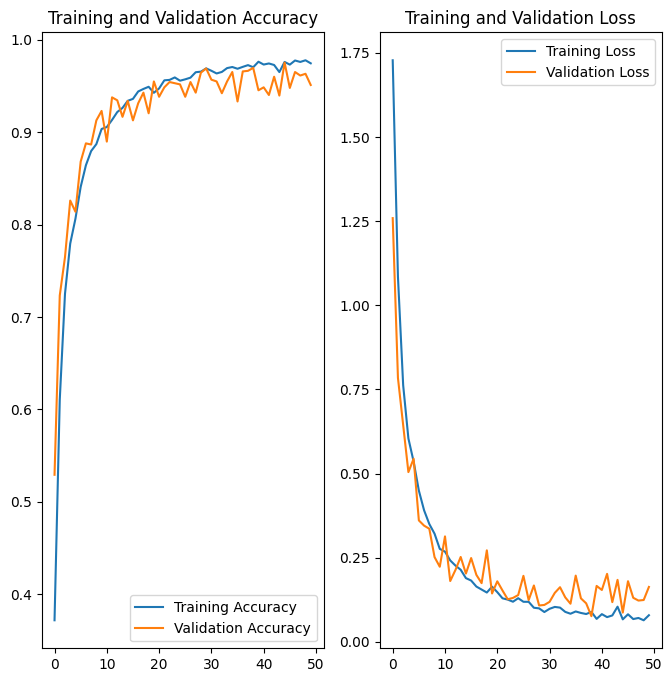

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Running prediction on a sample image

first image to predict
actual label: Tomato_healthy
1/1 [==============================] - 1s 805ms/step
predicted label: Tomato_healthy


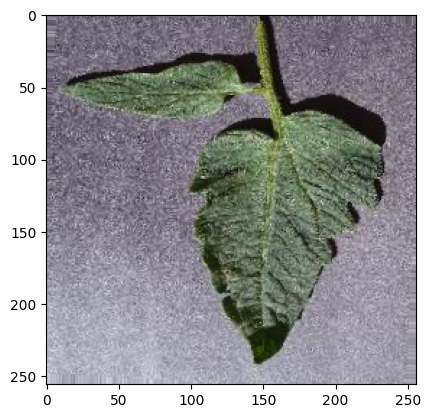

In [21]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classes[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",classes[np.argmax(batch_prediction[0])])
    
    break

## Writing a function for inference

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 43ms/step


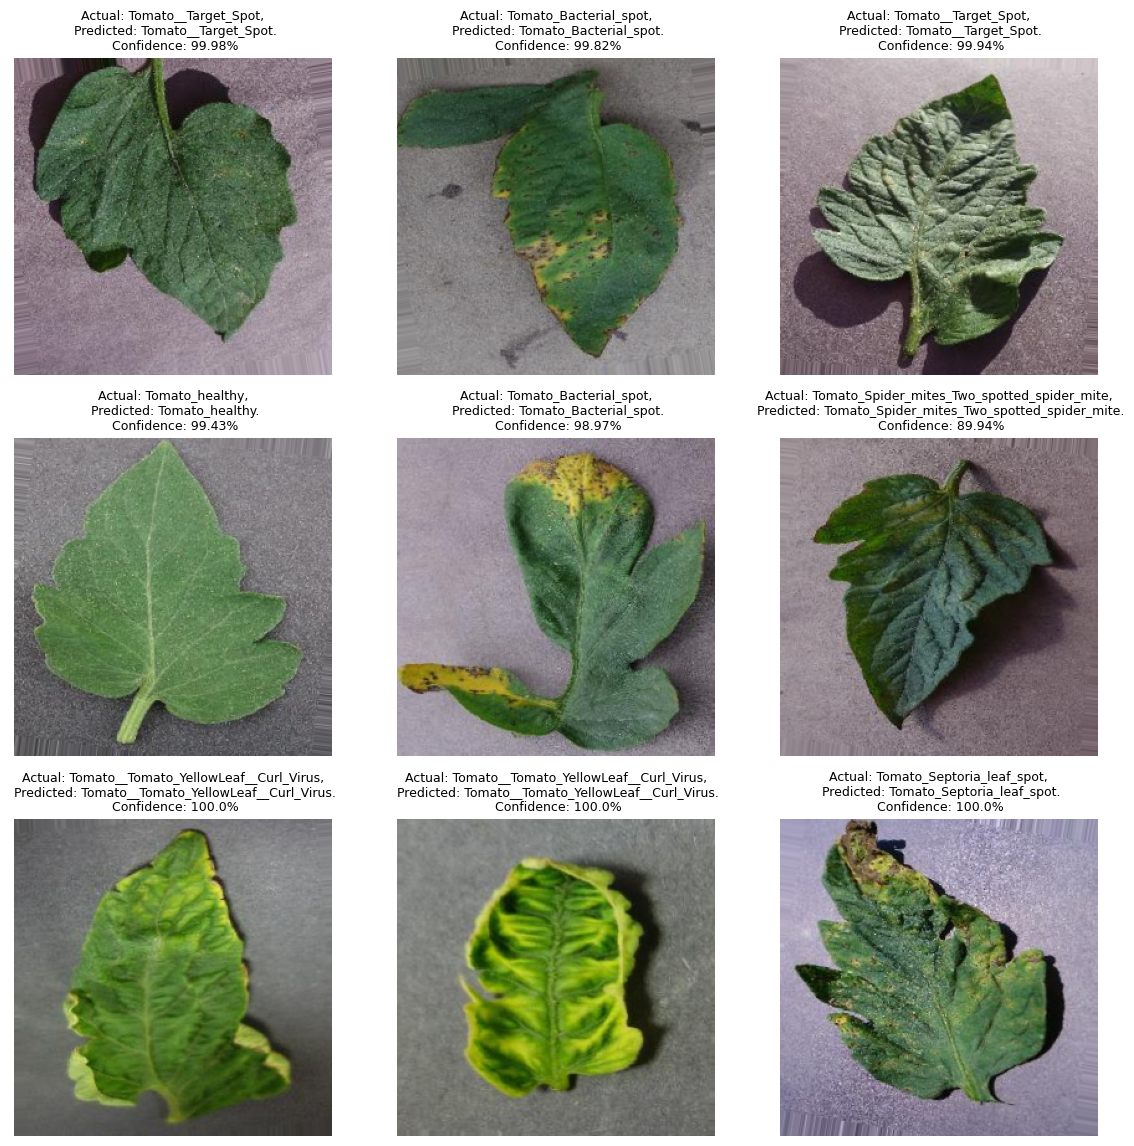

In [33]:
plt.figure(figsize=(14, 14))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = classes[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%",fontdict={'fontsize': 9})
        
        plt.axis("off")
    break

### Saving the Model

Saved the model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [35]:
model.save("../tomato_classification.h5")